## Fun with Recurrent neural networks (RNN)
In this example we will construct a simple RNN and train in it a some carbon cycle data and see if it has learned
the pattern

Play with the structure of the network and see if you can improve the classification

- Arun Aniyan
- arun@ska.ac.za
- SKA SA

In [1]:
import numpy as np
from itertools import cycle
from pybrain.datasets import SequentialDataSet
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure.modules import LSTMLayer
from pybrain.supervised import RPropMinusTrainer
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


### Import Carbon data

In [2]:
data = np.loadtxt('data/newcarbondata.csv',delimiter=',')

years = data[:,0]

carbon = data[:,1:]

### Show some info on data

In [3]:
print 'Start year of observations: %d' %(years[0])
print 'End year of observations: %d' %(years[-1])
print 'Total duration : %d yrs' %(years[-1]-years[0])

Start year of observations: 1959
End year of observations: 2011
Total duration : 52 yrs


### Some preprocessing

In [4]:
carbon = carbon.reshape(1,carbon.shape[0]*carbon.shape[1])
t = np.linspace(years[0],years[-1],carbon.shape[1])

### Plot the data 

(1958.0, 2012.0)

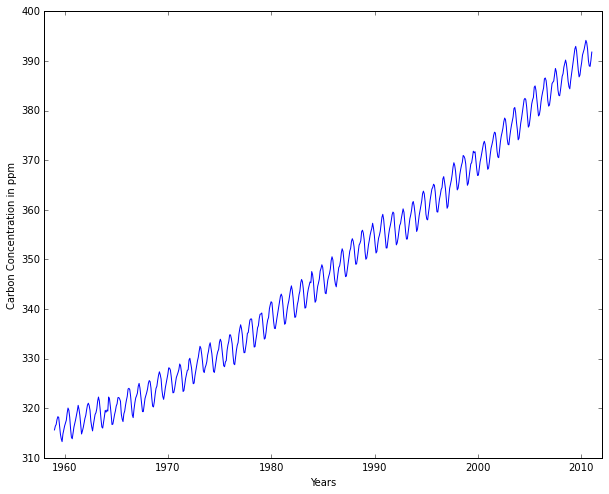

In [5]:
plt.plot(t,carbon[0,:])
plt.xlabel('Years')
plt.ylabel('Carbon Concentration in ppm')
plt.xlim([years[0]-1, years[-1]+1])

### Convert to sequential dataset

In [6]:
l = carbon.shape[1]
ds = SequentialDataSet(1, 1)
for sample, next_sample in zip(carbon[0,0:l], cycle(carbon[0,0:l])):
    ds.addSample(sample, next_sample)

### Build a simple LSTM network 

In [7]:
net = buildNetwork(1, 800, 1,hiddenclass=LSTMLayer, outputbias=False, recurrent=True)

### Train the network

In [8]:
trainer = RPropMinusTrainer(net, dataset=ds)
train_errors = [] # save errors for plotting later
EPOCHS_PER_CYCLE = 50
CYCLES = 1000
EPOCHS = EPOCHS_PER_CYCLE * CYCLES
trainer.trainEpochs(EPOCHS_PER_CYCLE)
train_errors.append(trainer.testOnData())
print "Final error =", train_errors[-1]

Final error = 9.08627146087


###  Generate the outputs 

In [9]:
predicted = np.zeros([1,l])
actual_next = np.zeros([1,l])

i=0
for sample, target in ds.getSequenceIterator(0):
    predicted[0,i] = net.activate(sample)
    actual_next[0,i] = target
    i+=1
   

### Make plots

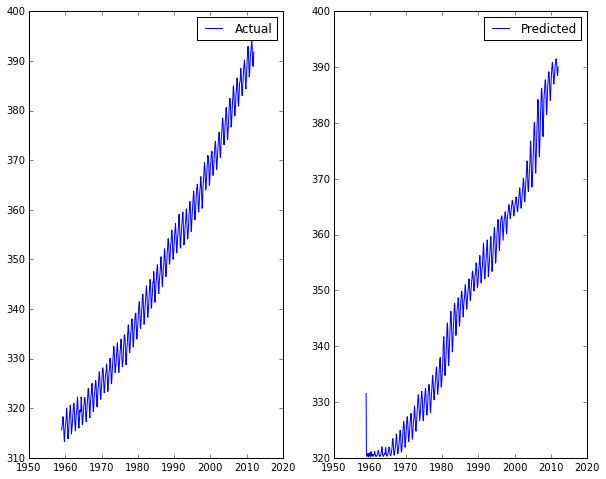

In [10]:
new_time = np.linspace(years[0],np.round(l/12)+years[0],l)

plt.subplot(1,2,1)
plt.plot(new_time,actual_next[0,:],label='Actual')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(new_time,predicted[0,:],label='Predicted')
plt.legend(loc='upper right')